In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC


In [2]:
# upload to data
test = pd.read_csv('mitbih_test.csv',header=None) 
train = pd.read_csv('mitbih_train.csv',header=None)

In [3]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
print(f" Train veri setinde {train.shape[0]} adet sinyal bulunmaktadır.")  # train veri setinde bulunan sinyal sayısı(satır sayısı)
print(f" Test veri setinde {test.shape[0]} adet sinyal bulunmaktadır.")

 Train veri setinde 87554 adet sinyal bulunmaktadır.
 Test veri setinde 21892 adet sinyal bulunmaktadır.


In [5]:
a = train.isnull().any().any()  # train veri setinde null yani boş değer var mı

if(a==True):
    print("Train veri setinde boş değer bulunmakta.")
else:
    print("Train veri setinde boş değer yoktur.")

b = test.isnull().any().any()

if(b==True):
    print("Test veri setinde boş değer bulunmakta.")
else:
    print("Test veri setinde boş değer yoktur.")

Train veri setinde boş değer yoktur.
Test veri setinde boş değer yoktur.


In [6]:
train[187]      #son sütun sonuç sütunu(sinyalin hangi sınıfa ait olduğunu gösterir)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
87549    4.0
87550    4.0
87551    4.0
87552    4.0
87553    4.0
Name: 187, Length: 87554, dtype: float64

In [7]:
label_title={
    0:"Normal Beat (N)",
    1:"Supraventricular premature or ectopic beat (S)",
    2:"Premature ventricular contraction (V)",
    3:"Fusion of ventricular and normal beat (F)",
    4:"Unclassified beat (Q)"
}
train[187]=train[187].map(label_title)

In [8]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal Beat (N)
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal Beat (N)
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal Beat (N)
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal Beat (N)
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal Beat (N)


In [9]:
train[187].value_counts()   # 187.sütunda kaç sinyal çeşitlerinden kaçar tane olduğunu bulduk

187
Normal Beat (N)                                   72471
Unclassified beat (Q)                              6431
Premature ventricular contraction (V)              5788
Supraventricular premature or ectopic beat (S)     2223
Fusion of ventricular and normal beat (F)           641
Name: count, dtype: int64

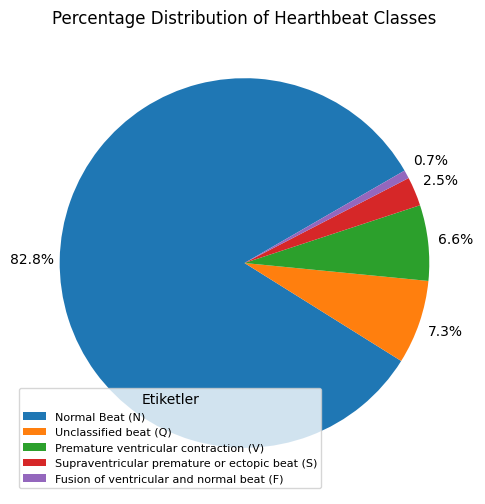

In [10]:
# Pasta grafiği ile görselleştirme
plt.figure(figsize=(8, 6))
wedges, texts,autotexts = plt.pie(train[187].value_counts(), startangle=30, autopct='%1.1f%%', pctdistance=1.15)
plt.title('Percentage Distribution of Hearthbeat Classes')

for autotext in autotexts:
    autotext.set_color('black')  
    autotext.set_fontsize(10)

plt.legend(wedges, train[187].value_counts().index, title="Etiketler", loc="lower left",prop={'size': 8})
plt.show()


C:\Users\rabia\AppData\Local\Temp\ipykernel_252\109164114.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  random_samples = train.groupby('Label').apply(lambda x: x.sample(n=8))
C:\Users\rabia\AppData\Local\Temp\ipykernel_252\109164114.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  random_samples = train.groupby('Label').apply(lambda x: x.sample(n=num_samples))


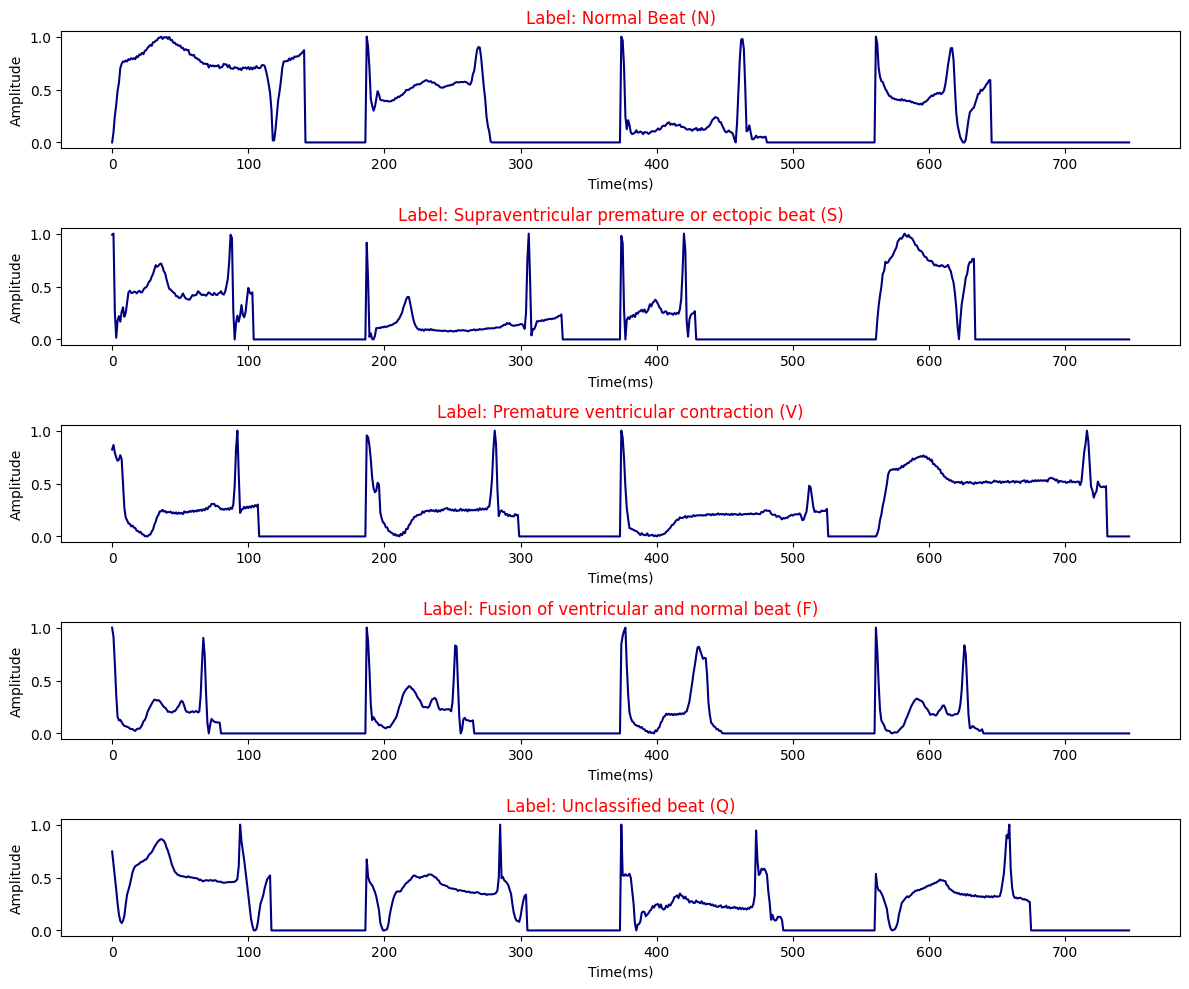

In [11]:
#her sınıftan random birer örnek aldık daha sonra bu sinyalleri görselleştirdik
train.rename(columns={187: 'Label'}, inplace=True)

unique_labels = train['Label'].unique()
random_samples = train.groupby('Label').apply(lambda x: x.sample(n=8))

num_samples = 4  # 3 veya 4 örnek seçebilirsiniz
random_samples = train.groupby('Label').apply(lambda x: x.sample(n=num_samples))

# Her sınıf için ayrı bir grafik oluştur
plt.figure(figsize=(12, 10))
for i, label in enumerate(unique_labels):
    plt.subplot(len(unique_labels), 1, i + 1)
    label_samples = random_samples[random_samples['Label'] == label]

    # Sinyalleri uç uca ekleyerek tek bir sinyal oluştur
    combined_signal = np.concatenate([row[:187].values for index, row in label_samples.iterrows()])

    # Sinyali görselleştir
    plt.plot(combined_signal, label=f'Label: {label}', color="navy")
    plt.title(f'Label: {label}', color="red")
    plt.xlabel('Time(ms)')
    plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [12]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,Label
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal Beat (N)
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal Beat (N)
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal Beat (N)
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal Beat (N)
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal Beat (N)


In [13]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Etiketleri dönüştürme (label_title sözlüğü mevcutsa uygulayın)
label_title = {
    "Normal Beat (N)": 0,
    "Supraventricular premature or ectopic beat (S)": 1,
    "Premature ventricular contraction (V)": 2,
    "Fusion of ventricular and normal beat (F)": 3,
    "Unclassified beat (Q)": 4
}

# Eğitim ve test veri setlerinde etiketleri sayısal değerlere çeviriyoruz
train["Label"] = train["Label"].map(label_title)

In [15]:
# Model eğitimi ve değerlendirmesi için bir fonksiyon
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Model"):
    """
    Verilen model ile eğitim yapar ve sonuçları değerlendirir.
    
    Args:
        model: Makine öğrenimi modeli (örneğin LogisticRegression, RandomForestClassifier)
        X_train: Eğitim veri seti (özellikler)
        y_train: Eğitim veri seti (etiketler)
        X_test: Test veri seti (özellikler)
        y_test: Test veri seti (etiketler)
        model_name: Modelin adı (örneğin "Logistic Regression")
    """
    # Modeli eğit
    model.fit(X_train, y_train)
    
    # Test seti üzerinde tahminler yap
    y_pred = model.predict(X_test)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix ({model_name})")
    plt.show()
    
    # Classification Report
    print(f"Classification Report ({model_name}):\n")
    print(classification_report(y_test, y_pred))
 
# Eğitim ve test verilerinizi hazırlayın
X_train = train.iloc[:, :-1].values
y_train = train.iloc[:, -1].values
X_test = test.iloc[:, :-1].values
y_test = test.iloc[:, -1].values

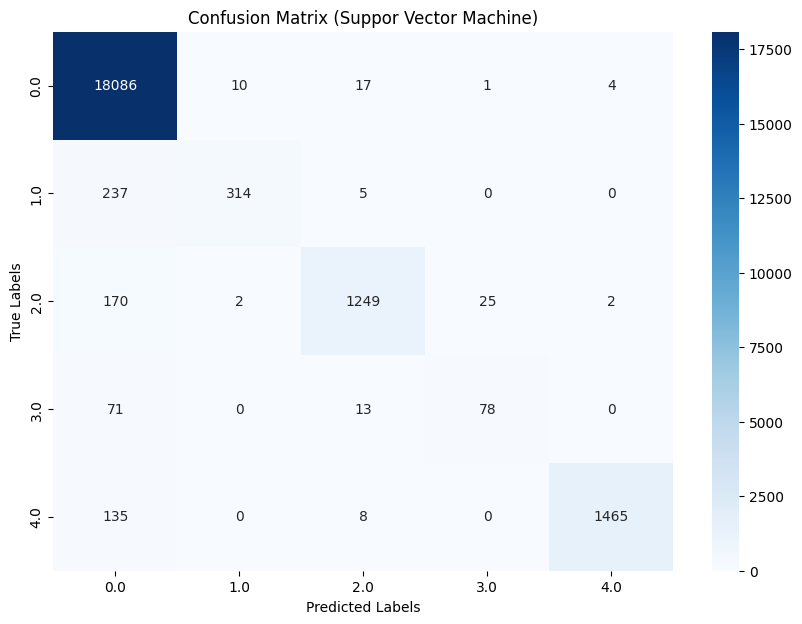

Classification Report (Suppor Vector Machine):

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     18118
         1.0       0.96      0.56      0.71       556
         2.0       0.97      0.86      0.91      1448
         3.0       0.75      0.48      0.59       162
         4.0       1.00      0.91      0.95      1608

    accuracy                           0.97     21892
   macro avg       0.93      0.76      0.83     21892
weighted avg       0.97      0.97      0.97     21892



In [17]:
from sklearn.svm import SVC
svm_model = SVC()
train_and_evaluate_model(svm_model, X_train, y_train, X_test, y_test, model_name="Suppor Vector Machine")

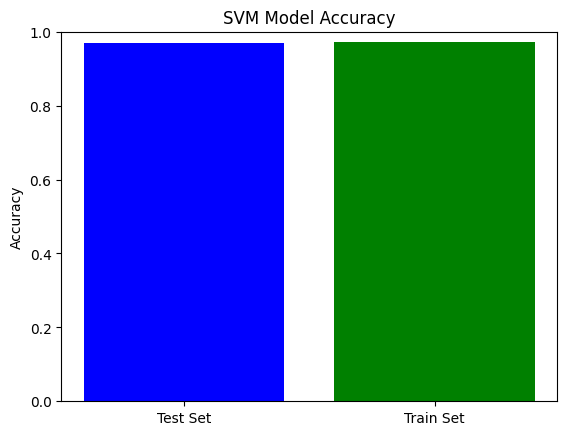

In [18]:
from sklearn.metrics import accuracy_score
y_head_test_svm = svm_model.predict(X_test)
y_head_train_svm = svm_model.predict(X_train)

acc_test_svm = accuracy_score(y_test,y_head_test_svm)
acc_train_svm = accuracy_score(y_train,y_head_train_svm)

labels = ['Test Set', 'Train Set']
accuracy_values = [acc_test_svm, acc_train_svm]

plt.bar(labels, accuracy_values, color=['blue', 'green'])

plt.title('SVM Model Accuracy')
plt.ylabel('Accuracy')
plt.ylim([0, 1])  

plt.show()

c:\Users\rabia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


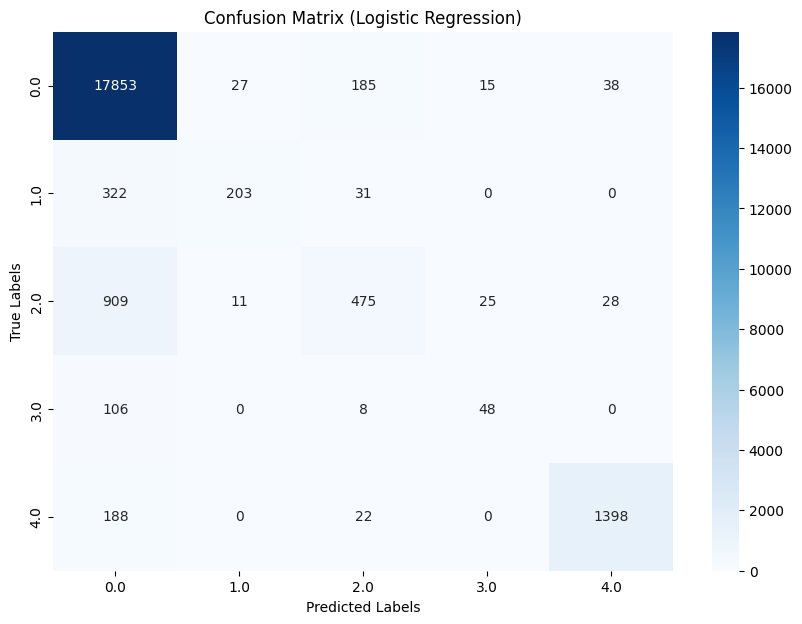

Classification Report (Logistic Regression):

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     18118
         1.0       0.84      0.37      0.51       556
         2.0       0.66      0.33      0.44      1448
         3.0       0.55      0.30      0.38       162
         4.0       0.95      0.87      0.91      1608

    accuracy                           0.91     21892
   macro avg       0.78      0.57      0.64     21892
weighted avg       0.90      0.91      0.90     21892



In [30]:

# Logistic Regression ile eğitim ve değerlendirme
lr_model = LogisticRegression()
train_and_evaluate_model(lr_model, X_train, y_train, X_test, y_test, model_name="Logistic Regression")


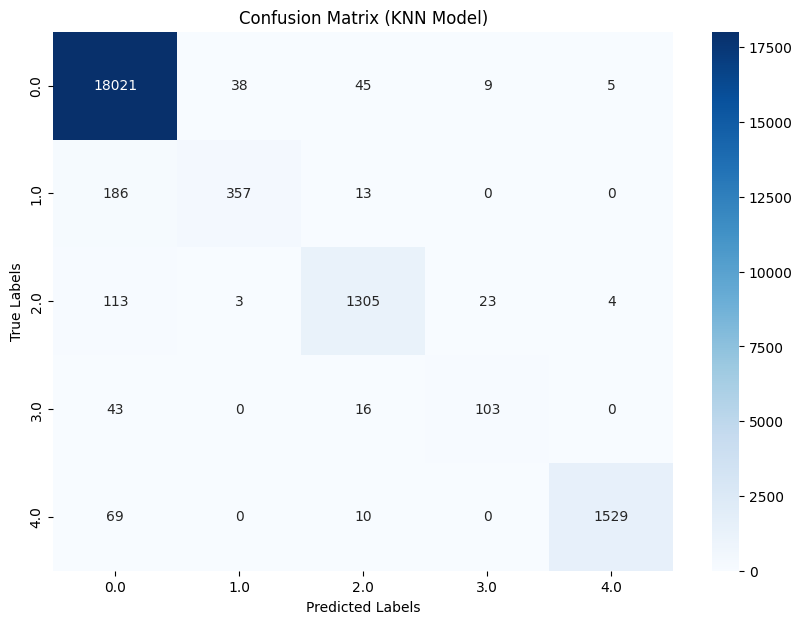

Classification Report (KNN Model):

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     18118
         1.0       0.90      0.64      0.75       556
         2.0       0.94      0.90      0.92      1448
         3.0       0.76      0.64      0.69       162
         4.0       0.99      0.95      0.97      1608

    accuracy                           0.97     21892
   macro avg       0.91      0.82      0.86     21892
weighted avg       0.97      0.97      0.97     21892



In [31]:
# KNN ile eğitim ve değerlendirme
knn_model = KNeighborsClassifier()
train_and_evaluate_model(knn_model, X_train, y_train, X_test, y_test, model_name="KNN Model")


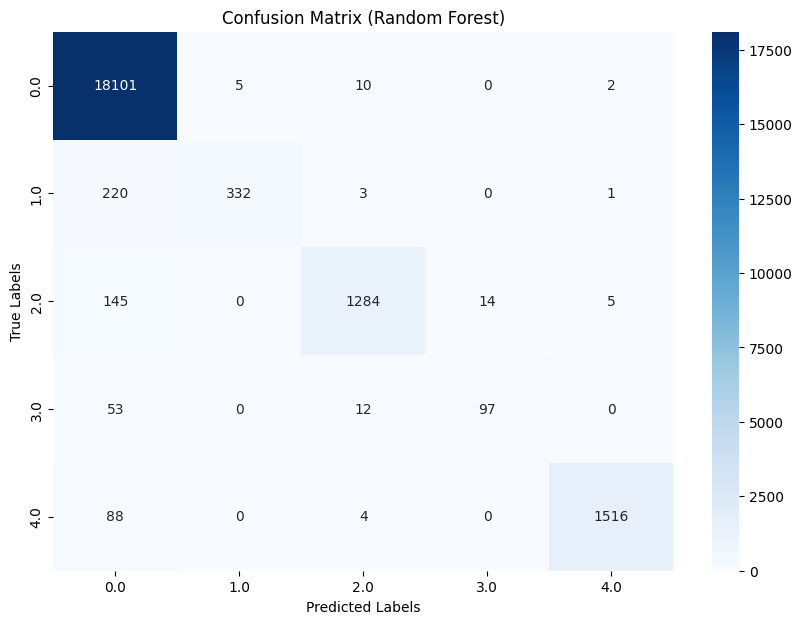

Classification Report (Random Forest):

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99     18118
         1.0       0.99      0.60      0.74       556
         2.0       0.98      0.89      0.93      1448
         3.0       0.87      0.60      0.71       162
         4.0       0.99      0.94      0.97      1608

    accuracy                           0.97     21892
   macro avg       0.96      0.80      0.87     21892
weighted avg       0.97      0.97      0.97     21892



In [32]:
# Random Forest ile eğitim ve değerlendirme
rf_model = RandomForestClassifier()
train_and_evaluate_model(rf_model, X_train, y_train, X_test, y_test, model_name="Random Forest")


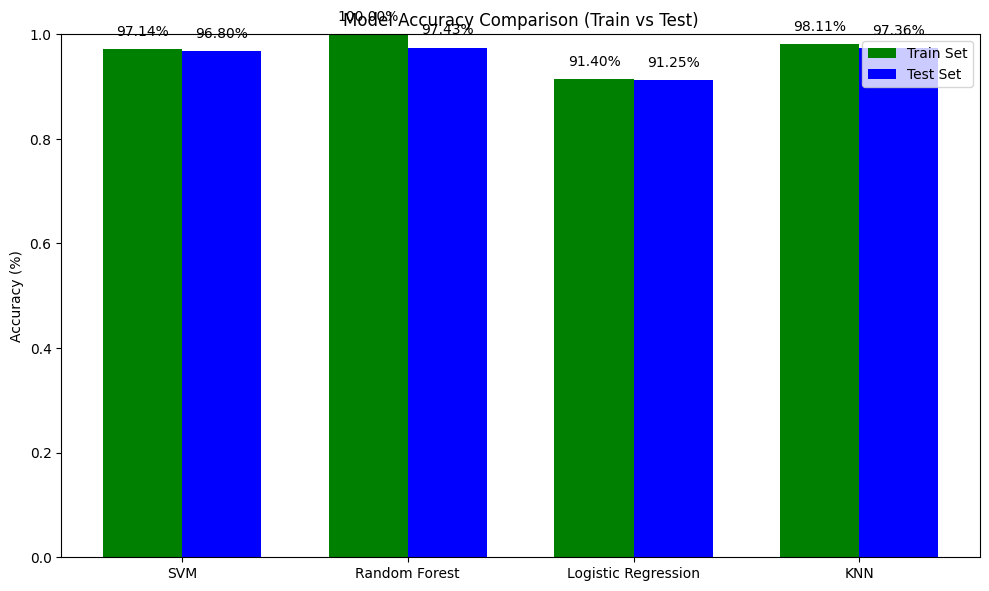

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Assuming svm_model, rf_model, lr_model, and knn_model are already defined
# Example: Replace the below lines with actual predictions for each model
y_head_test_svm = svm_model.predict(X_test)
y_head_train_svm = svm_model.predict(X_train)

y_head_test_rf = rf_model.predict(X_test)
y_head_train_rf = rf_model.predict(X_train)

y_head_test_lr = lr_model.predict(X_test)
y_head_train_lr = lr_model.predict(X_train)

y_head_test_knn = knn_model.predict(X_test)
y_head_train_knn = knn_model.predict(X_train)

# Calculate accuracy for test and train sets for all models
acc_test_svm = accuracy_score(y_test, y_head_test_svm)
acc_train_svm = accuracy_score(y_train, y_head_train_svm)

acc_test_rf = accuracy_score(y_test, y_head_test_rf)
acc_train_rf = accuracy_score(y_train, y_head_train_rf)

acc_test_lr = accuracy_score(y_test, y_head_test_lr)
acc_train_lr = accuracy_score(y_train, y_head_train_lr)

acc_test_knn = accuracy_score(y_test, y_head_test_knn)
acc_train_knn = accuracy_score(y_train, y_head_train_knn)

# Prepare data for the bar plot
models = ['SVM', 'Random Forest', 'Logistic Regression', 'KNN']
acc_train = [acc_train_svm, acc_train_rf, acc_train_lr, acc_train_knn]
acc_test = [acc_test_svm, acc_test_rf, acc_test_lr, acc_test_knn]

# Set width of bars
bar_width = 0.35
index = range(len(models))

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(index, acc_train, bar_width, label='Train Set', color='green')
bar2 = ax.bar([i + bar_width for i in index], acc_test, bar_width, label='Test Set', color='blue')

# Add titles and labels
ax.set_title('Model Accuracy Comparison (Train vs Test)')
ax.set_ylabel('Accuracy (%)')
ax.set_xticks([i + bar_width / 2 for i in index])  # To center the ticks between the bars
ax.set_xticklabels(models)
ax.set_ylim(0, 1)  # Set y-axis from 0 to 100%

# Show percentages on top of the bars
for i in range(len(models)):
    ax.text(i, acc_train[i] + 0.02, f'{acc_train[i]*100:.2f}%', ha='center', va='bottom', fontsize=10)
    ax.text(i + bar_width, acc_test[i] + 0.02, f'{acc_test[i]*100:.2f}%', ha='center', va='bottom', fontsize=10)

# Add legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()
